In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CustomSGD:
    def __init__(self, params, lr=0.01, momentum=0, dampening=0, weight_decay=0):
        """
        A simple implementation of Stochastic Gradient Descent (SGD) optimizer

        Args:
            params: iterable of parameters to optimize
            lr: learning rate (default: 0.01)
            momentum: momentum factor (default: 0)
            dampening: dampening for momentum (default: 0)
            weight_decay: weight decay (L2 penalty) (default: 0)
        """
        self.params = list(params)
        self.lr = lr

    def zero_grad(self):
        for p in self.params:
            if p.grad is not None:
                p.grad.detach_()
                p.grad.zero_()

    def step(self):
        for p in self.params:
            if p.grad is None:
                continue
            else:
                grad = p.grad.data
                p.data.add_(grad, alpha=-self.lr)

In [3]:
np.random.seed(42)
X = np.random.rand(10000000, 1)
y = 2 * X

X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearModel()
print("Initial parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

criterion = nn.MSELoss()

Initial parameters:
linear.weight: tensor([[-0.7930]])
linear.bias: tensor([0.7206])


In [4]:
torch_sgd = optim.SGD(model.parameters(), lr=.1)

epochs = 500
torch_losses = []

for epoch in range(epochs):
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    torch_losses.append(loss.item())

    torch_sgd.zero_grad()
    loss.backward()
    torch_sgd.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

print("\nFinal parameters with PyTorch SGD:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

Epoch 20/500, Loss: 0.3127
Epoch 40/500, Loss: 0.1841
Epoch 60/500, Loss: 0.1080
Epoch 80/500, Loss: 0.0638
Epoch 100/500, Loss: 0.0374
Epoch 120/500, Loss: 0.0220
Epoch 140/500, Loss: 0.0130
Epoch 160/500, Loss: 0.0076
Epoch 180/500, Loss: 0.0045
Epoch 200/500, Loss: 0.0026
Epoch 220/500, Loss: 0.0015
Epoch 240/500, Loss: 0.0009
Epoch 260/500, Loss: 0.0005
Epoch 280/500, Loss: 0.0003
Epoch 300/500, Loss: 0.0002
Epoch 320/500, Loss: 0.0001
Epoch 340/500, Loss: 0.0001
Epoch 360/500, Loss: 0.0000
Epoch 380/500, Loss: 0.0000
Epoch 400/500, Loss: 0.0000
Epoch 420/500, Loss: 0.0000
Epoch 440/500, Loss: 0.0000
Epoch 460/500, Loss: 0.0000
Epoch 480/500, Loss: 0.0000
Epoch 500/500, Loss: 0.0000

Final parameters with PyTorch SGD:
linear.weight: tensor([[1.9967]])
linear.bias: tensor([0.0017])


In [5]:
model = LinearModel()

print("Initial parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

custom_sgd = CustomSGD(model.parameters(), lr=0.1)

custom_losses = []

for epoch in range(epochs):
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    custom_losses.append(loss.item())

    custom_sgd.zero_grad()
    loss.backward()
    custom_sgd.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

print("\nFinal parameters with Custom SGD:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

Initial parameters:
linear.weight: tensor([[0.7697]])
linear.bias: tensor([0.7281])
Epoch 20/500, Loss: 0.0811
Epoch 40/500, Loss: 0.0478
Epoch 60/500, Loss: 0.0280
Epoch 80/500, Loss: 0.0166
Epoch 100/500, Loss: 0.0097
Epoch 120/500, Loss: 0.0057
Epoch 140/500, Loss: 0.0034
Epoch 160/500, Loss: 0.0020
Epoch 180/500, Loss: 0.0012
Epoch 200/500, Loss: 0.0007
Epoch 220/500, Loss: 0.0004
Epoch 240/500, Loss: 0.0002
Epoch 260/500, Loss: 0.0001
Epoch 280/500, Loss: 0.0001
Epoch 300/500, Loss: 0.0000
Epoch 320/500, Loss: 0.0000
Epoch 340/500, Loss: 0.0000
Epoch 360/500, Loss: 0.0000
Epoch 380/500, Loss: 0.0000
Epoch 400/500, Loss: 0.0000
Epoch 420/500, Loss: 0.0000
Epoch 440/500, Loss: 0.0000
Epoch 460/500, Loss: 0.0000
Epoch 480/500, Loss: 0.0000
Epoch 500/500, Loss: 0.0000

Final parameters with Custom SGD:
linear.weight: tensor([[1.9983]])
linear.bias: tensor([0.0009])


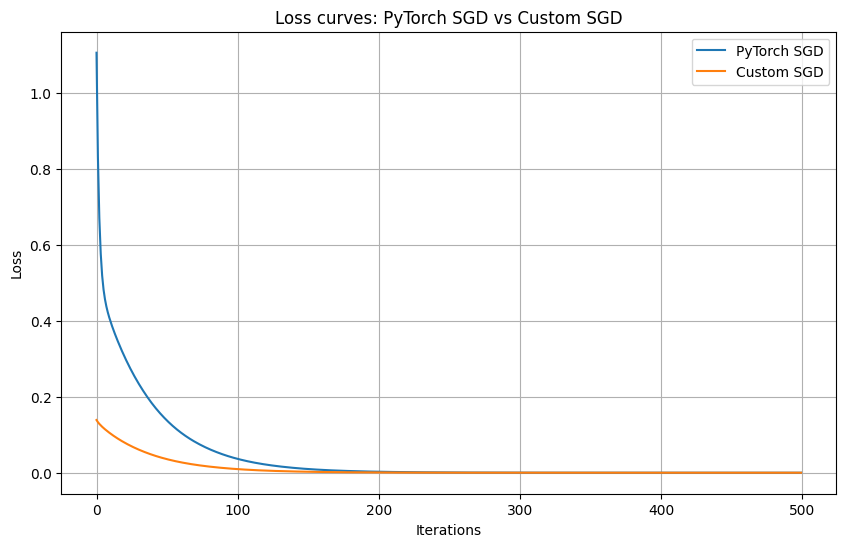

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(torch_losses, label='PyTorch SGD')
plt.plot(custom_losses, label='Custom SGD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss curves: PyTorch SGD vs Custom SGD')
plt.legend()
plt.grid(True)
plt.show()